In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/monicaxu/Zuckflix/netflix_titles.csv', index_col=0)
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
data_ratings = pd.read_csv('/Users/monicaxu/Zuckflix/titles_and_ratings.csv', index_col=0)
data_ratings.head()

,imdb_rating
title,
Money Heist: The Phenomenon,7.5/10
Money Talks,6.2/10
The Money Trap,6.3/10
All the Boys Love Mandy Lane,5.5/10
Monkey Planet,8.5/10


In [8]:
data = data.drop_duplicates(subset=['title'])
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [9]:
data = pd.merge(data, data_ratings, on = 'title')
data['imdb_value'] = data[' imdb_rating'].str[:3]
data = data.drop([4404])
counter = pd.to_numeric(data['imdb_value'], downcast='float')
print(counter)
#data[data['imdb_value']==8.1].count


0       5.9
1       4.6
2       6.0
3       5.3
4       6.4
       ... 
4976    7.6
4977    4.4
4978    6.6
4979    6.1
4980    6.9
Name: imdb_value, Length: 4980, dtype: float32


In [12]:
rating_counter = data['imdb_value'].value_counts()
print(rating_counter[rating_counter>8.0])

#data['imdb_value'] = data['imdb_value'].astype(float, errors = 'raise')
#data['imdb_value'] = data['imdb_value']>5.0

#print(data['imdb_value'])

6.8    194
6.6    185
7.2    180
7.3    178
6.5    174
7.4    174
6.4    171
6.7    167
7.1    163
6.2    156
7.0    156
6.3    152
7.6    144
6.9    142
5.8    135
6.1    133
5.7    122
7.5    122
6.0    113
7.7    113
5.6    108
8.0    108
5.4     95
5.9     94
8.1     94
5.3     91
7.8     90
5.5     89
7.9     84
5.2     79
8.4     66
8.2     66
5.1     64
4.4     55
8.3     53
4.8     51
4.7     50
5.0     50
4.9     43
8.5     41
4.3     37
4.6     37
8.6     33
4.5     30
4.2     29
4.1     23
8.8     22
8.7     21
3.6     18
3.7     17
3.8     16
3.9     16
3.5     12
9.1     11
8.9     10
4.0     10
3.4     10
9.0      9
Name: imdb_value, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

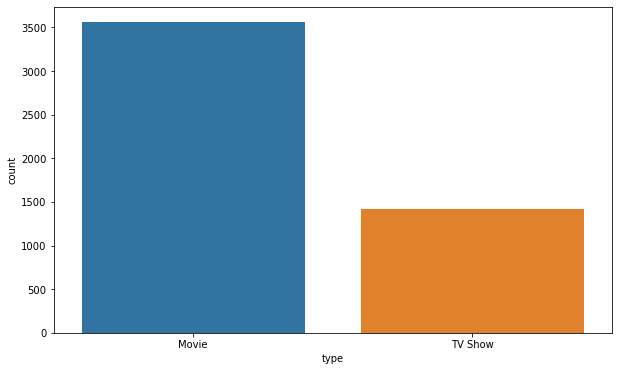

In [13]:
plt.figure(figsize=(10,6))

x= data.type.value_counts()
sns.countplot(x= "type",data= data)

Text(0.5, 1.0, 'Movie and Tv Show Release Years')

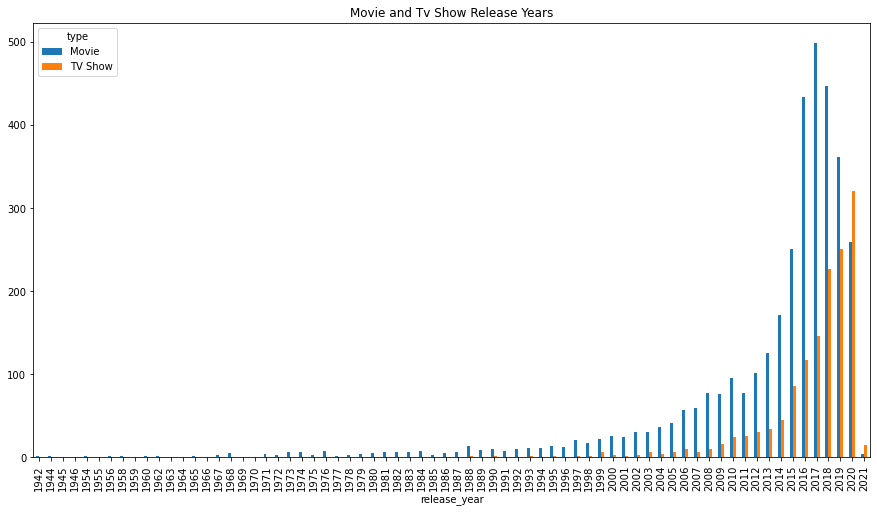

In [14]:
pd.crosstab(data.release_year, data.type).plot(kind='bar',figsize=(15,8))
plt.title('Movie and Tv Show Release Years')

Text(0, 0.5, 'Count')

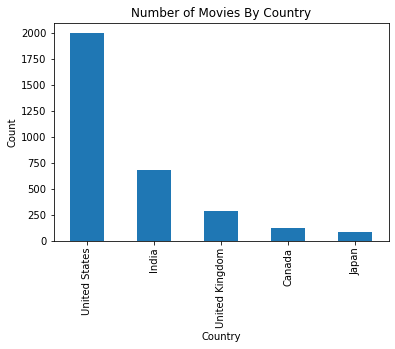

In [15]:
data['country'].value_counts().sort_values(ascending=False)[:5].plot.bar()
plt.title('Number of Movies By Country')
plt.xlabel('Country')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

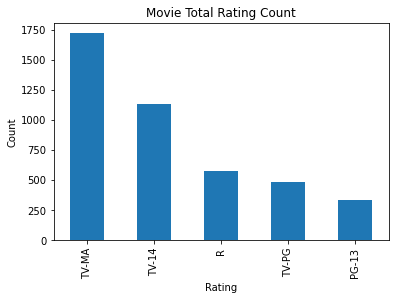

In [16]:
data['rating'].value_counts().sort_values(ascending=False)[:5].plot.bar()
plt.title('Movie Total Rating Count')
plt.xlabel('Rating')
plt.ylabel('Count')

In [244]:
#df = pd.DataFrame({'Rating':data['rating']}, index = data['country'])
#ax = df.plot.bar(rot=0)

United States                    1992
India                             674
United Kingdom                    282
Canada                            125
Japan                              86
South Korea                        76
Australia                          62
France                             55
United Kingdom, United States      54
Name: country, dtype: int64
Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan',
       'South Korea', 'Australia', 'France', 'United Kingdom, United States'],
      dtype='object')


Text(0, 0.5, 'Count')

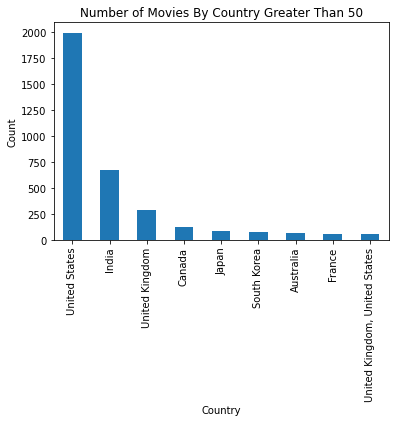

In [17]:
# number movies per country
country_counter = data['country'].value_counts()
print(country_counter[country_counter>50])

axis = country_counter[country_counter>50].index
print(axis)
data_country = data[data.country.isin(axis)]

data_plot = data_country.country.value_counts()
data_plot.plot(kind ='bar')
plt.title('Number of Movies By Country Greater Than 50')
plt.xlabel('Country')
plt.ylabel('Count')


In [18]:
#countries = ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']
#data_group = data.loc[data['country'].isin(countries)]

#group_plot = data_group['rating'].groupby(data_group['country']).value_counts()
#print(group_plot.keys)
#fig = plt.figure(figsize=(12,6))
#group_plot.plot(kind ='bar')


Text(0, 0.5, 'Count')

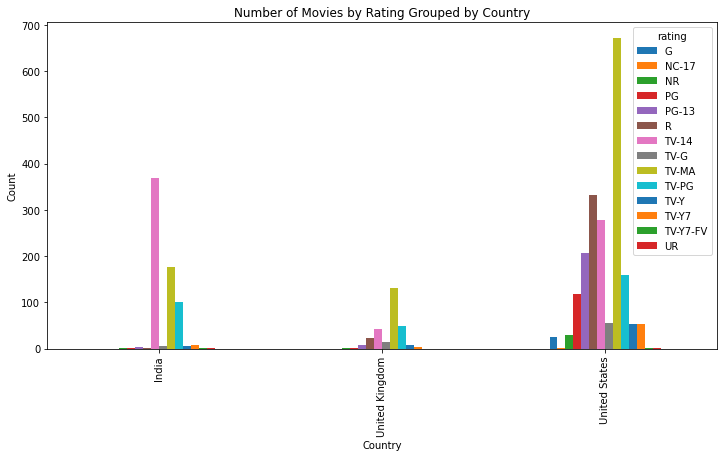

In [19]:
countries = ['United States', 'India', 'United Kingdom']
data_group = data.loc[data['country'].isin(countries)]

#print(data_group)

group_plot = data_group['rating'].groupby(data_group['country']).value_counts()
group_plot.unstack().plot(kind='bar', figsize = (12,6))

plt.title('Number of Movies by Rating Grouped by Country')
plt.xlabel('Country')
plt.ylabel('Count')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


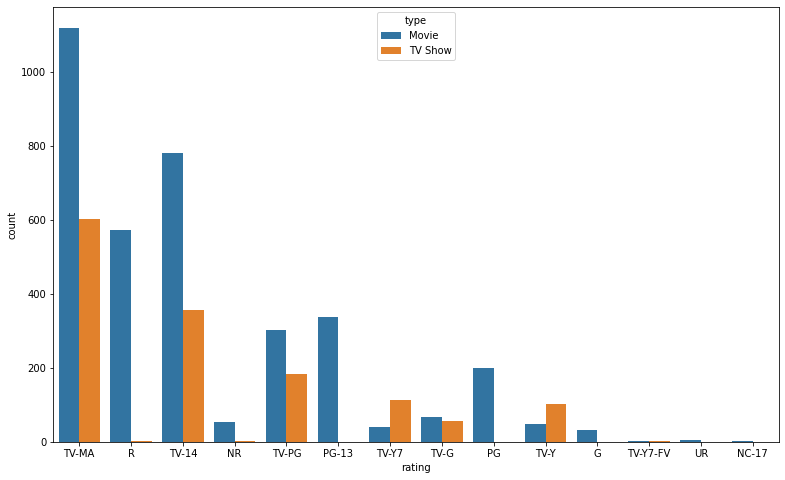

In [248]:
plt.figure(figsize=(13,8))
sns.countplot(data['rating'][:],hue=data['type'])

In [249]:
# look at imdb_rating compared to number of movies 

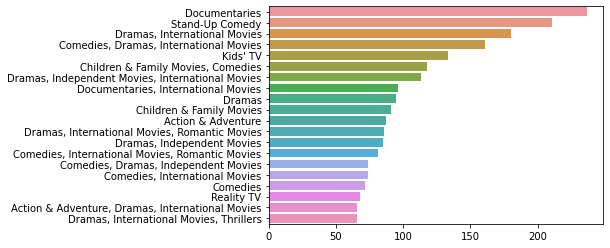

In [250]:
n= data['listed_in'].value_counts()[:20]
n
sns.barplot(x=n.values,y=n.index)

/Users/monicaxu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duration distribution of movies on netflix(in minute)')

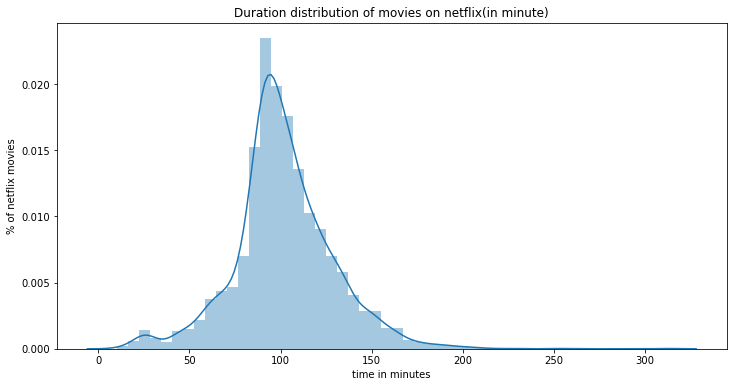

In [20]:
l=[]
m=[]

for i in data['duration']:
    if i[3:6]=='min':
        l.append(int(i[0:2]))
    elif i[4:7]=='min':
        l.append(int(i[0:3]))
    elif i[3:10]=='Season':
        m.append(int(i[0:2]))

#durasi movie dalam menit
plt.figure(figsize=(12,6))
#sns.set_style('darkgrid')
sns.distplot(l)
plt.xlabel('time in minutes')
plt.ylabel('% of netflix movies')
plt.title('Duration distribution of movies on netflix(in minute)')

<AxesSubplot:xlabel='director'>

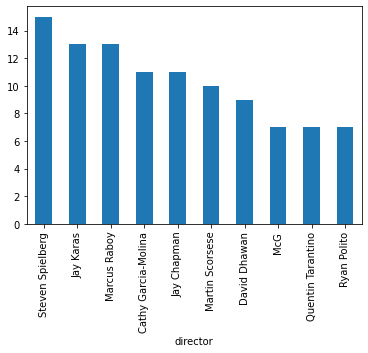

In [21]:
data.groupby('type').director.value_counts()['Movie'][:10].plot(kind='bar')

In [260]:
director_data = data[data['director']=='Steven Spielberg']
dir_sorted = director_data.sort_values('imdb_value', ascending=False)
dir_sorted



,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating,imdb_value
3393,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,8.9/10,8.9
1911,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",United States,"January 1, 2019",1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,8.4/10,8.4
1909,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,"January 1, 2019",1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",8.2/10,8.2
1910,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,"Harrison Ford, Sean Connery, Denholm Elliott, ...",United States,"January 1, 2019",1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",8.2/10,8.2
793,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","January 1, 2021",2002,PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,8.1/10,8.1
794,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","January 1, 2021",2002,PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,8.1/10,8.1
1912,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,"January 1, 2019",1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",7.5/10,7.5
1913,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,"January 1, 2019",1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",7.5/10,7.5
1914,Movie,Indiana Jones and the Temple of Doom,Steven Spielberg,"Harrison Ford, Kate Capshaw, Amrish Puri, Rosh...",United States,"January 1, 2019",1984,PG,119 min,"Action & Adventure, Children & Family Movies, ...","Indiana Jones, his young sidekick and a spoile...",7.5/10,7.5
2328,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India","February 21, 2018",2012,PG-13,150 min,Dramas,Director Steven Spielberg takes on the towerin...,7.3/10,7.3


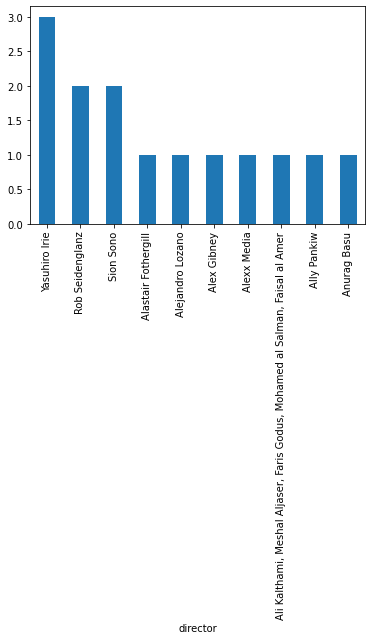

In [254]:
data.groupby('type').director.value_counts()['TV Show'][:10].plot(kind='bar')

In [255]:
data[data['director']=='Rob Seidenglanz']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating,imdb_value
1043,TV Show,DC's Legends of Tomorrow,Rob Seidenglanz,"Victor Garber, Brandon Routh, Caity Lotz, Fran...",United States,"June 10, 2020",2020,TV-14,5 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy","A mysterious ""time master"" from the future uni...",6.8/10,6.8
3265,TV Show,Riverdale,Rob Seidenglanz,"K.J. Apa, Lili Reinhart, Camila Mendes, Cole S...",United States,"May 14, 2020",2019,TV-14,4 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries","While navigating the troubled waters of sex, r...",6.8/10,6.8


In [256]:
sorted = data.sort_values('imdb_value', ascending=False)
sorted

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,imdb_rating,imdb_value
3930,Movie,The Chosen,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,TV-14,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",9.7/10,9.7
3929,Movie,The Chosen,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico","April 14, 2017",2016,TV-14,111 min,"Dramas, International Movies, Thrillers","In 1937, Spanish revolutionary Ramón trains as...",9.7/10,9.7
1554,Movie,God of War,Gordon Chan,"Vincent Zhao, Sammo Kam-Bo Hung, Regina Wan, Y...","China, Hong Kong","December 16, 2017",2017,NR,129 min,"Action & Adventure, International Movies",A maverick leader and a clever young general t...,9.6/10,9.6
3052,TV Show,Planet Earth II,NaN,David Attenborough,United Kingdom,"December 25, 2017",2016,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV","In this sequel to the Emmy-winning ""Planet Ear...",9.5/10,9.5
707,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4/10,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Movie,Himmatwala,Sajid Khan,"Ajay Devgn, Tamannaah Bhatia, Paresh Rawal, Za...",India,"November 1, 2018",2013,TV-14,140 min,"Action & Adventure, Comedies, International Mo...",A young man returns to his native village on a...,1.7/10,1.7
2093,Movie,Justin Bieber: Never Say Never,Jon M. Chu,"Justin Bieber, Ludacris, Usher Raymond, Jaden ...",United States,"January 1, 2018",2011,G,106 min,"Documentaries, Music & Musicals",Teen idol Justin Bieber provides personal snap...,1.6/10,1.6
2300,Movie,Leo the Lion,Mario Cambi,"Daniel Amerman, John Cygan, Matthew Mercer, Am...","United States, Italy","December 20, 2015",2013,TV-Y7-FV,78 min,"Children & Family Movies, Comedies",Eschewing the carnivorous ways of his fellow l...,1.6/10,1.6
990,Movie,Cuties,Maïmouna Doucouré,"Fathia Youssouf, Médina El Aidi-Azouni, Esther...",France,"September 9, 2020",2020,TV-MA,96 min,"Dramas, International Movies",Eleven-year-old Amy starts to rebel against he...,1.5/10,1.5
